# `PRPROCESSING` on `PRICE` and `AREA` columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/processed/gurgaon_10k.csv')
print(df.shape)
df.head()

(10285, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
0,70597758,H70597758,Gurgaon,3.19 Cr,31900000,31900000,20202.0,1579 sq.ft.,146.69 sq.m.,146.693837,146.693837,20202.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.532594', 'LONGITUDE': '77.020...",3 BHK Flat in Sector 113 Gurgaon,"There is a 3 BHK apartment in Sector 113, Gurg...",Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,25.0,N,3.0,NaN,La Vida by Tata Housing,NaN,1.0
1,70436188,H70436188,Gurgaon,1.85 Cr,18500000,18500000,9135.0,2025 sq.ft.,188.13 sq.m.,188.128575,188.128575,9135.0,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",12.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.3855771', 'LONGITUDE': '76.97...",3 BHK Flat in Sector 77 Gurgaon,Let your dream of owning a flat come true with...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,6,24.0,N,3.0,NaN,Emaar Palm Heights,NaN,1.0
2,70217014,L70217014,Gurgaon,12.06 Cr,120600992,120600992,42736.0,2822 sq.ft.,262.17 sq.m.,262.172266,262.172266,42736.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",5 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 5 BHK flats in Sector 53...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,5.0,NaN,Tulip Monsella,NaN,1.0
3,70217012,X70217012,Gurgaon,9.53 Cr,95258544,95258544,42736.0,2229 sq.ft.,207.08 sq.m.,207.080787,207.080787,42736.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",4 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 4 BHK flats in Sector 53...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,4.0,NaN,Tulip Monsella,NaN,1.0
4,70217010,A70217010,Gurgaon,7.18 - 7.22 Cr,72150764,71800092,43834.0,1638-1646 sq.ft.,152.18-152.92 sq.m.,152.918338,152.175114,43834.0,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0,"[{'text': '1 Metro Station'}, {'text': '1 Shop...","{'LATITUDE': '28.4350568', 'LONGITUDE': '77.10...",3 BHK Flat in Sector 53 Gurgaon,Tulip Monsella offers 3 BHK apartments in Sect...,Residential Apartment,"{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",0,0,5,20.0,N,3.0,NaN,Tulip Monsella,NaN,1.0


In [4]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

## Drop duplicates

In [5]:
df['PROP_ID'].duplicated().sum()

27

In [6]:
drop_index = df[df['PROP_ID'].duplicated() == True].index
df.drop(index=drop_index, inplace=True)

In [7]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
MAX_PRICE                        0
MIN_PRICE                        0
PRICE_SQFT                       0
AREA                             0
SECONDARY_AREA                   0
MAX_AREA_SQFT                    0
MIN_AREA_SQFT                    0
PRICE_PER_UNIT_AREA              0
SECONDARY_TAGS                   0
TOTAL_LANDMARK_COUNT           116
FORMATTED_LANDMARK_DETAILS     116
MAP_DETAILS                      0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
location                         0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     54
FEATURES                         0
BEDROOM_NUM                   1012
AMENITIES                      282
PROP_NAME                     1856
BALCONY_NUM         

In [8]:
# Separate price and area columns
price_cols = ['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT']
area_cols = ['AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT', 'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA']

price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

## Price

### Clean Price

In [9]:
df[price_cols].sample(10)

,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT
7593,1.85 cr,18500000,18500000,10440.0
2272,4.55 cr,45500000,45500000,24594.0
2814,65 l,6500000,6500000,4259.0
2171,"48,000",48000,48000,18.0
6881,1.92 cr,19200000,19200000,9600.0
802,4.65 cr,46500000,46500000,155000.0
4295,2.7 l,270000,270000,74.0
7480,4.5 cr,45000000,45000000,18695.0
9853,2.6 cr,26000000,26000000,10156.0
3603,2.1 cr,21000000,21000000,109375.0


Extract the values from `PRICE` column and convert it into integer price then compare it with `PRICE_SQFT` column.

In [10]:
df['PRICE'] = df['PRICE'].str.replace(',', '')
df['PRICE'].nunique()

1313

In [11]:
df['PRICE'].str.split(' ').str.get(-1).unique()

array(['cr', 'request', 'l', 'onwards', '35000', '65000', '25000',
       '27000', '70000', '60000', '15000', '20000', '52000', '45000',
       '56000', '85000', '38000', '40000', '26000', '38201', '50000',
       '43500', '43000', '95000', '63500', '80000', '82000', '32000',
       '31000', '60500', '45500', '75000', '62000', '90000', '42000',
       '33000', '12100', '40500', '46000', '40100', '29000', '30000',
       '21000', '58000', '59500', '24000', '48000', '72000', '34000',
       '54500', '36000', '53000', '61000', '77000', '29500', '64000',
       '55000', '22000', '97000', '93000', '44000', '59000', '76300',
       '78000', '77500', '75500', '61500', '69000', '51000', '54900',
       '74500', '67000', '41000', '52500', '28000', '12800', '8000',
       '84000', '73000', '9000', '23000', '14000', '17000', '12000',
       '63000', '16200', '24500', '82500', '18000', '44500', '19000',
       '14200', '26999', '24999', '12999', '34500', '23900', '29999',
       '15500', '49000', 

In [12]:
temp = df[df['PRICE'].str.contains(r'bed|price on request') == True]
len(temp)

53

In [13]:
temp.sample(3)

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
4702,65053512,x65053512,gurgaon,price on request,150000000,150000000,300000.0,4500 sq.ft.,418.06 sq.m.,418.06350,418.06350,300000.0,"['ready to move', 'resale']",47.0,"[{'text': '1 metro station'}, {'text': '2 reli...","{'latitude': '28.4572434', 'longitude': '77.07...",12 bedroom house in sushant lok phase 1,it's a fully furnished 12bhk and 12bathroom mo...,independent house/villa,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",1,7,2,3.0,"23,25,26",12.0,"23,25,26,101,102,103",NaN,1.0,NaN
9514,67130030,c67130030,gurgaon,10000/bed,10000,10000,62.0,160 sq.ft.,14.86 sq.m.,14.86448,14.86448,62.0,"['furnished', 'shared by 5']",32.0,"[{'text': '2 shoppings'}, {'text': '2 religiou...","{'latitude': '28.5068253', 'longitude': '77.06...",1 bhk independent builder floor in sector 22 g...,our's is a newly constructed smart residencies...,independent/builder floor,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",1,1,6,4.0,"44,23,45,24,25,47,29,19,1,5,8,40,30,41,42,32,2...",1.0,"5,8,32,21,44,23,45,24,47,29,19,1,40,30,41,42,4...",NaN,1.0,4
9510,5171167,n5171167,gurgaon,15000/bedroom,15000,15000,42.0,350 sq.ft.,32.52 sq.m.,32.51605,32.51605,42.0,['private room'],47.0,"[{'text': '3 metro stations'}, {'text': '2 rel...","{'latitude': '28.428647', 'longitude': '77.092...",1 bedroom house in sector 56 gurgaon,"a beautiful room with marble flooring, lcd tel...",independent house/villa,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",2,0,1,NaN,n,1.0,NaN,awho devinder vihar,NaN,NaN


In [14]:
df.loc[temp.index, 'PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
independent house/villa      17
residential apartment        13
residential land             10
independent/builder floor     8
studio apartment              4
serviced apartments           1
Name: count, dtype: int64

In [15]:
df.drop(index=temp.index, inplace=True)

In [16]:
print(df[df['PRICE'].str.contains(r'\d') == True].shape)
print(df[df['PRICE'].str.contains(r'cr|l') == True].shape)  # Prices in Crore and Lacs
print(df[df['PRICE'].str.contains(r'cr|l') == False].shape)  # Prices in Thousands

(10205, 30)
(7962, 30)
(2243, 30)


In [17]:
df[df['PRICE'].str.contains(r'cr|l') == False].sample(3)  # Prices in Thousands

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
3783,70241716,z70241716,gurgaon,85000,85000,85000,268.0,2844 sq.ft.,264.22 sq.m.,264.216132,264.216132,268.0,"['furnished', 'for single men', 'for single wo...",44.0,"[{'text': '6 metro stations'}, {'text': '1 rel...","{'latitude': '28.4934896', 'longitude': '77.10...",4 bhk independent builder floor in dlf phase 3,"this property is located in dlf phase 3, gurga...",independent/builder floor,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",1,3,6,4.0,"44,23,45,24,25,47,26,19,5,40,41,42,21",4.0,"5,21,44,23,45,24,47,19,40,41,42,25,26,103",NaN,2.0,4
7592,70828696,r70828696,gurgaon,65000,65000,65000,37.0,1750 sq.ft.,162.58 sq.m.,162.580250,162.580250,37.0,"['furnished', 'for single women']",47.0,"[{'text': '1 religious place'}, {'text': '2 at...","{'latitude': '28.424305', 'longitude': '77.061...",3 bhk independent builder floor in sector 50 g...,sheesham wood sturdy and beautiful furniture i...,independent/builder floor,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",1,1,1,2.0,"44,24,6,19,41,32",3.0,"32,44,24,6,19,41,102,103",mayfield gardens,2.0,1
8760,70801676,z70801676,gurgaon,70000,70000,70000,31.0,2245 sq.ft.,208.57 sq.m.,208.567235,208.567235,31.0,[],44.0,"[{'text': '7 metro stations'}, {'text': '1 rel...","{'latitude': '28.491453', 'longitude': '77.090...",4 bhk flat in dlf phase 2,"dlf phase 2, gurgaon, haryana\ndlf phase 2, gu...",residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",4,3,2,19.0,"44,23,45,24,46,25,47,26,28,29,30,31,10,32,33,1...",4.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",dlf belvedere towers,4.0,10


#### Deal with ranged prices

> **Example:** `7.18  - 7.22 cr`

In [18]:
temp = df[df['PRICE'].str.contains('-', regex=False) == True]['PRICE']
print(temp.shape)
temp.head()

(102,)


4     7.18  - 7.22 cr
5     1.55  - 2.35 cr
7      2.7  - 2.99 cr
14    3.84  - 4.64 cr
15     2.8  - 3.67 cr
Name: PRICE, dtype: object

In [19]:
temp_price_mean = temp.str.extract(r'(\d*\.?\d+)\W+-\W+(\d*\.?\d+)\W+(\w+)', expand=True)
temp_price_mean.head()

,0,1,2
4,7.18,7.22,cr
5,1.55,2.35,cr
7,2.7,2.99,cr
14,3.84,4.64,cr
15,2.8,3.67,cr


In [20]:
temp_price_mean.isnull().sum()

0    3
1    3
2    3
dtype: int64

In [21]:
null_values_idx = temp_price_mean[temp_price_mean[0].isnull()].index

temp.loc[null_values_idx].head()

133    93.01 l - 1.06 cr
177    93.01 l - 1.06 cr
199       90 l - 1.68 cr
Name: PRICE, dtype: object

In [22]:
df.loc[temp_price_mean[temp_price_mean[0].isnull()].index, 'MAX_PRICE']

133    10599758
177    10599758
199    16777215
Name: MAX_PRICE, dtype: int64

In [23]:
df.loc[null_values_idx, 'PRICE'] = df.loc[null_values_idx, 'MAX_PRICE'].astype(str)
temp_price_mean.drop(index=null_values_idx, inplace=True)

In [24]:
df.loc[temp_price_mean.index, 'PRICE'] = (
    temp_price_mean[[0, 1]]
    .astype(float)
    .mean(axis=1)
    .round(2)
    .astype(str)
    .add(' ')
    .add(temp_price_mean[2])
)

In [25]:
df.loc[temp.index, 'PRICE']

4         7.2 cr
5        1.95 cr
7        2.84 cr
14       4.24 cr
15       3.24 cr
          ...   
293     25.55 cr
296      1.68 cr
1292     8.58 cr
1299     6.54 cr
1300     4.07 cr
Name: PRICE, Length: 102, dtype: object

In [26]:
def handle_price(x: str) -> str | float:
    price = None

    if ' cr' in x:
        price = round(float(x.split(' ')[0]) * 1_00_00_000, 2)
    elif ' l' in x:
        price = round(float(x.split(' ')[0]) * 1_00_000, 2)

    return price if price else x

In [27]:
df['PRICE'] = df['PRICE'].str.replace('Onwards', '').apply(handle_price).astype(float)
df['PRICE'].skew()

9.561503554502474

<Axes: xlabel='PRICE', ylabel='Density'>

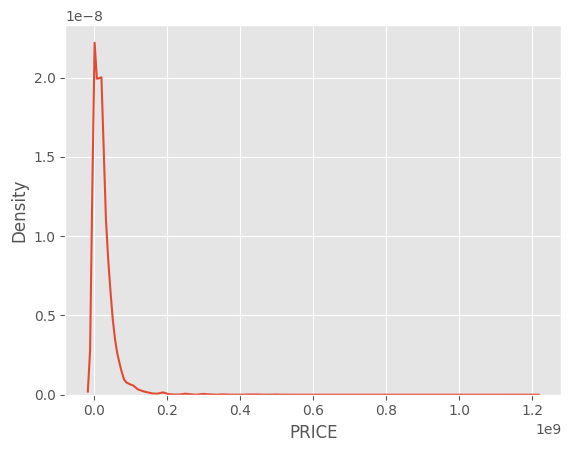

In [28]:
sns.kdeplot(df['PRICE'])

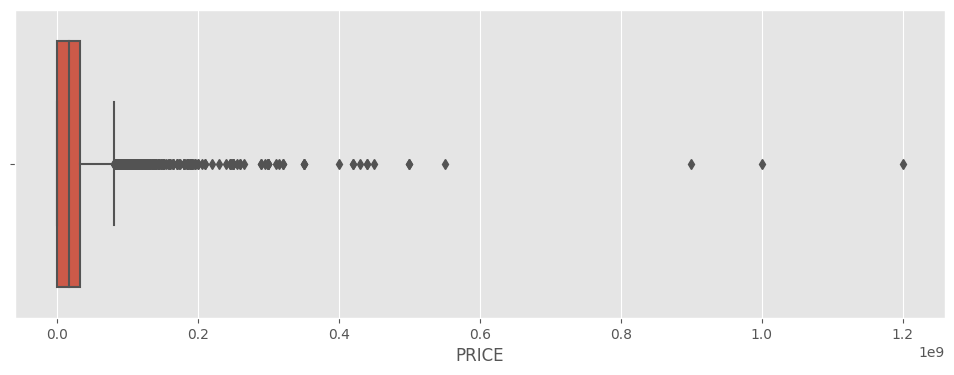

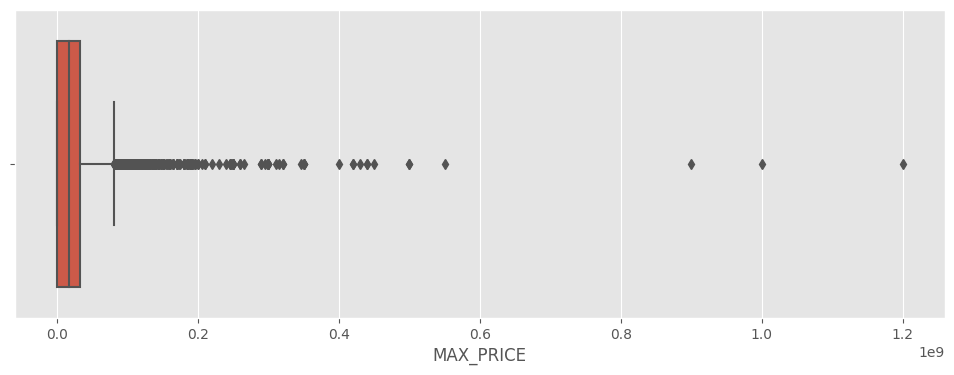

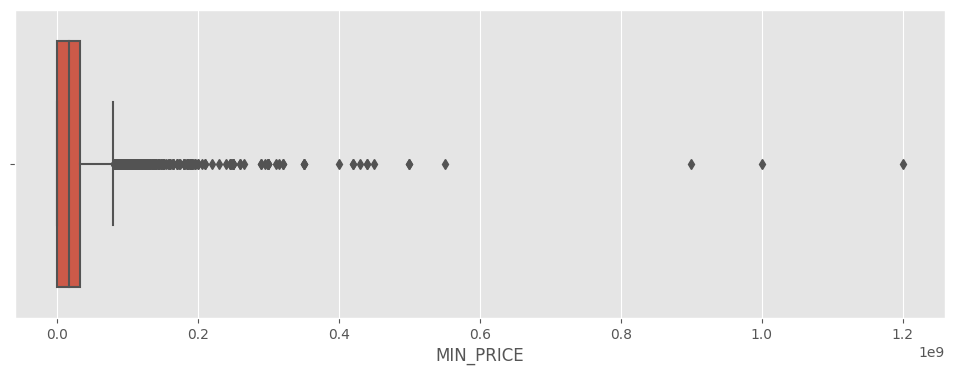

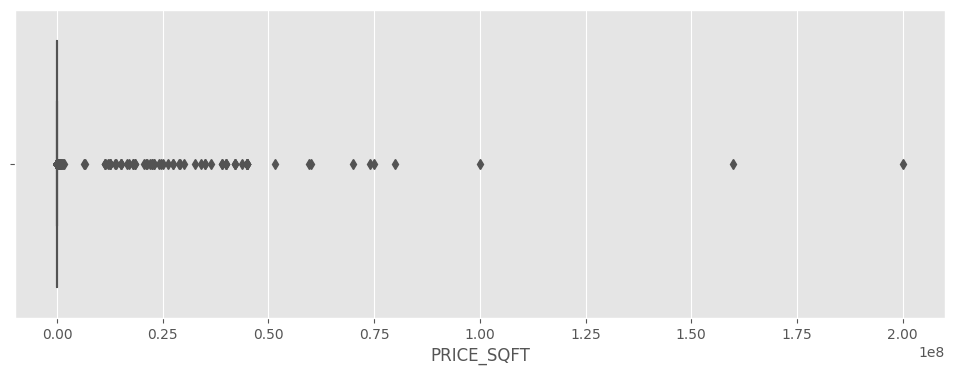

In [29]:
for col in price_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col])

## Area

### Clean Area

In [30]:
df['AREA'].sample(7)

840      2430 sq.ft.
7847     2700 sq.ft.
7623     4548 sq.ft.
3158     2400 sq.ft.
10109    1550 sq.ft.
3041     1944 sq.ft.
1229     2410 sq.ft.
Name: AREA, dtype: object

In [31]:
temp = df[df['AREA'].str.contains('sq.ft.', regex=False) == False]
print(temp.shape)
temp.head()

(0, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,MIN_AREA_SQFT,PRICE_PER_UNIT_AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


#### Deal with ranged areas

> **Example:** `1638-1646  sq.ft.`

In [32]:
temp = df[df['AREA'].str.contains('-', regex=False) == True]['AREA']
print(temp.shape)
temp.head()

(103,)


4     1638-1646  sq.ft.
5     1750-2650  sq.ft.
7     1850-2050  sq.ft.
14    1581-1911  sq.ft.
15    1111-1512  sq.ft.
Name: AREA, dtype: object

In [33]:
temp_area_mean = temp.str.extract(r'(\d+)-(\d+)', expand=True).astype(float).mean(axis=1)
df.loc[temp.index, 'AREA'] = temp_area_mean.astype(str).add(' sq.ft.')

In [34]:
df.loc[temp.index, 'AREA']

4       1642.0 sq.ft.
5       2200.0 sq.ft.
7       1950.0 sq.ft.
14      1746.0 sq.ft.
15      1311.5 sq.ft.
            ...      
292     1476.0 sq.ft.
293     3494.5 sq.ft.
296     1345.5 sq.ft.
1292    3475.0 sq.ft.
1299    2712.5 sq.ft.
Name: AREA, Length: 103, dtype: object

In [35]:
df['AREA'] = df['AREA'].str.split(' ').str.get(0).astype(float)
df['AREA'].skew()

56.002616873117155

In [36]:
df[area_cols].dtypes

AREA                   float64
SECONDARY_AREA          object
MAX_AREA_SQFT          float64
MIN_AREA_SQFT          float64
PRICE_PER_UNIT_AREA    float64
dtype: object

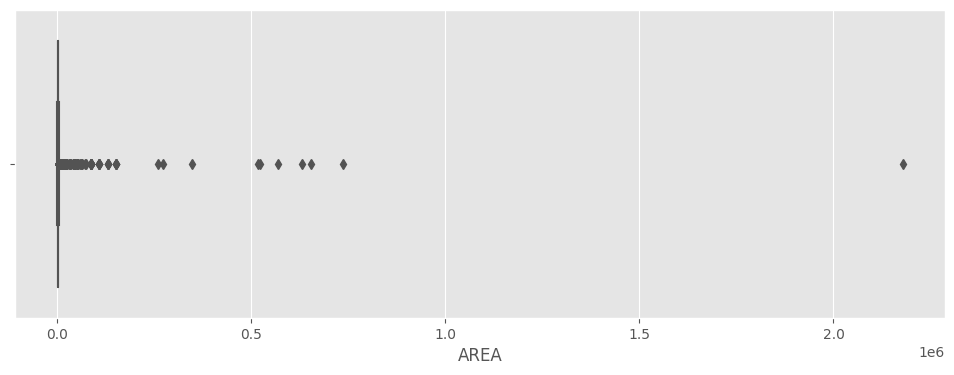

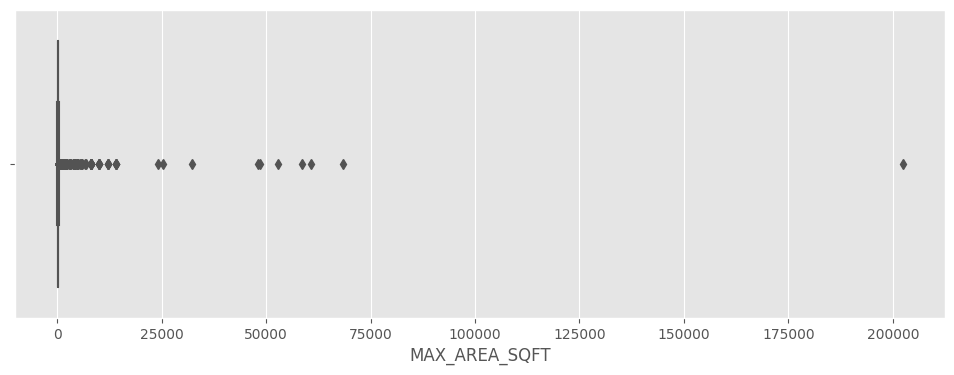

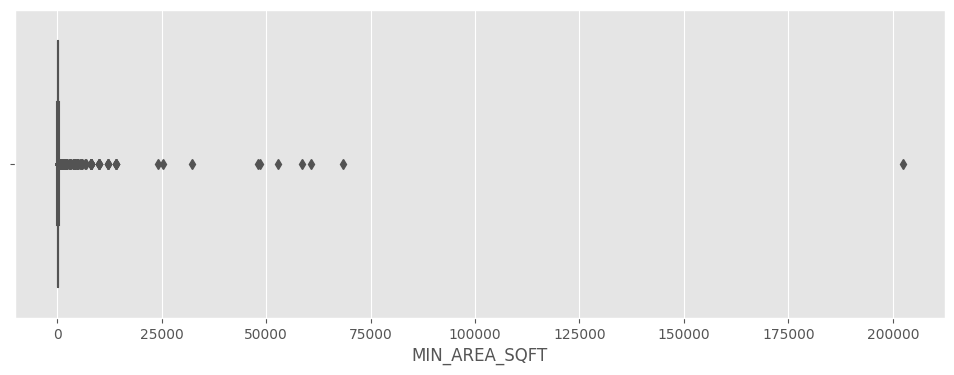

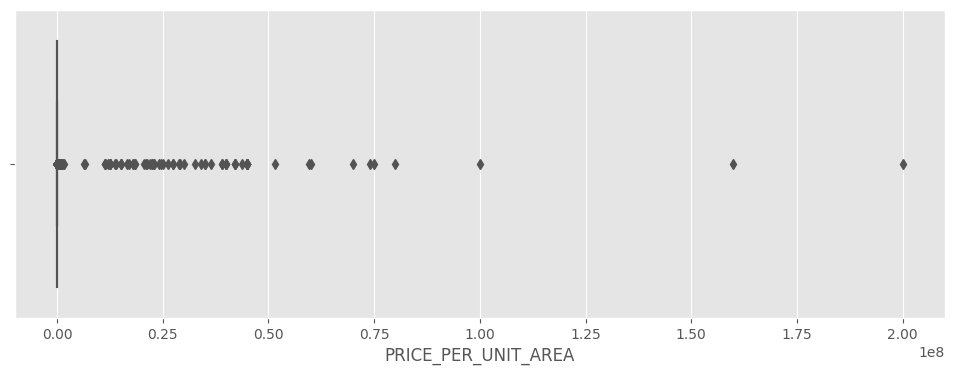

In [37]:
for col in area_cols:
    if 'SECONDARY_AREA' == col:
        continue

    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col])

## Price and Area

In [38]:
df.shape

(10205, 30)

In [39]:
df[['AREA', 'PRICE']].describe()

,AREA,PRICE
count,1.020500e+04,1.020500e+04
mean,3.623813e+03,2.434893e+07
std,2.741417e+04,3.719335e+07
min,1.000000e+00,5.500000e+03
25%,1.588000e+03,1.750000e+05
50%,2.085000e+03,1.700000e+07
75%,2.718000e+03,3.250000e+07
max,2.178000e+06,1.200000e+09


In [40]:
price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

In [41]:
upper_qantile = 0.95
lower_qantile = 0.05


def clip_col(col: str) -> pd.Series:
    return df[col].clip(*df[col].quantile([lower_qantile, upper_qantile]))

<Axes: xlabel='AREA', ylabel='PRICE'>

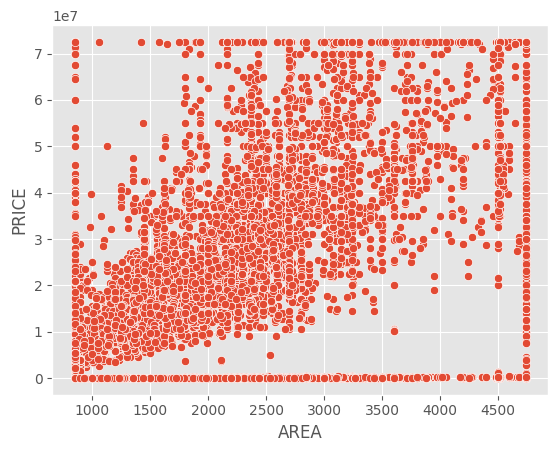

In [42]:
sns.scatterplot(x=clip_col('AREA'), y=clip_col('PRICE'))

<Axes: xlabel='AREA', ylabel='PRICE_SQFT'>

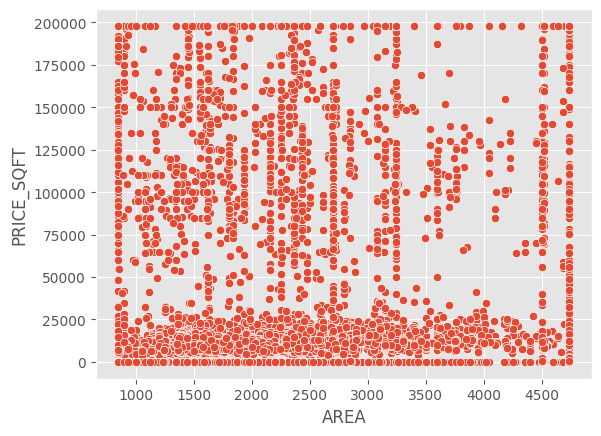

In [43]:
sns.scatterplot(x=clip_col('AREA'), y=clip_col('PRICE_SQFT'))